## Luis Cordero López

## Modelo Predictivo - Neural Network

Para este ejercicio usaremos los datos de _**autocasion_procesado.csv**_ para entrenar una red neuronal con **Keras** para predecir la columna de **precio**.

### Train, Test

Define **X_train**, **X_test**, **y_train** e **y_test** usando **train_test_split()** con **test_size = 0.2**, **random_state = 42**.


### Primer entrenamiento

- Prepara una arquitectura **MLP** (_Multilayer Perceptron_) sencilla y entrena el modelo. Anota el número de épocas que ha tardado el modelo en llegar a un _**plateau**_ y cuáles son las métricas obtenidas, guarda estos resultados en un DataFrame.
----
### Segundo entrenamiento

- **Preprocesamiento**: El dataset ya viene preprocesado, pero no se ha hecho ningún filtrado ni transformación, por lo que podemos hacer algo con la esperanza de mejorar nuestro modelo. Busca alguna forma de tratar los **outliers**, transforma las columnas que consideres que podrían aportar más información si estuvieran transformadas. También asegúrate de **normalizar los datos**.
    - _**Nota: deja comentarios justificando todas las decisiones de preprocesamiento que tomas.**_

- Crea un modelo nuevo con la misma arquitectura de antes y entrénalo con los datos nuevos. Fíjate ahora cuánto tarda en llegar a un _**plateau**_ y qué métrica has obtenido, guarda estos resultados en un DataFrame. ¿Tenemos un modelo mejor?
----

### Tercer entrenamiento

- **Tuning de arquitectura**: Vamos a probar una nueva arquitectura. Basándote en los resultados anteriores, piensa qué sería lo mejor para mejorar las métricas. Plantéate añadir o quitar capas, aumentar o disminuir el número de neuronas en cada capa, añadir capas **Dropout** o cambiar las funciones de activación.
    - _**Nota: deja comentarios justificando todas las decisiones de modelado de arquitectura que tomas.**_
      
- Cuando tengas una arquitectura nueva que creas que funcionará mejor, ponla a prueba con los datos que te funcionaron mejor. ¿Conseguiste mejorar el modelo? Si no es así, piensa en las posibles causas y coméntalas, guarda estos resultados en un DataFrame.
----

### Último entrenamiento

- **Fine tuning**: Intenta cambiar algunos hiperparámetros del modelo. Prueba con otro **optimizador**, o ajusta el **learning rate** al que ya estás utilizando. Considera investigar **callbacks** en la documentación para modificar el learning rate sobre la marcha.
    - _**Nota: deja comentarios justificando todas las decisiones de fine tuning que tomas.**_
- Entrena el nuevo modelo optimizado y comenta los resultados, guarda estos resultados en un DataFrame.

---

### Resultados
Muestra el DataFrame con los resultados obtenidos:

|Modelo|Epochs|MSE|
|------|------|---|


In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau

from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Input
from keras.utils import to_categorical 

from sklearn.ensemble import RandomForestRegressor

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import ReduceLROnPlateau


In [2]:
df = pd.read_csv('../Semana 13/autocasion_procesado.csv')
df

,Kilómetros,Cambio,Potencia (cv),Garantía,largo,ancho,alto,batalla_mm,peso_masa_kg,puertas,...,combustible_Mixto Gasolina/Etanol,combustible_nan,sobrealimentacion_Compresor Lisholm,sobrealimentacion_Compresor de raices,sobrealimentacion_Compresor y turbo,sobrealimentacion_Doble turbo,sobrealimentacion_Tipo de sobrealimentador,sobrealimentacion_Turbo,sobrealimentacion_Turbo de geometría variable,sobrealimentacion_nan
0,3900.0,1.0,179.0,12.0,4366.333333,1795.666667,1476.666667,2688.333333,1829.000000,5.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,4000.0,1.0,180.0,24.0,4403.666667,1808.000000,1503.333333,2653.000000,1880.000000,5.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,10.0,1.0,140.0,36.0,3657.000000,1627.000000,1480.000000,2300.000000,1425.000000,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,10.0,1.0,140.0,36.0,3657.000000,1627.000000,1480.000000,2300.000000,1425.000000,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,10.0,1.0,180.0,12.0,4549.666667,1834.333333,1482.333333,2717.666667,1946.666667,5.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87638,60000.0,0.0,390.0,12.0,4950.000000,2008.000000,1776.000000,2984.000000,2980.000000,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
87639,66070.0,0.0,390.0,12.0,4950.000000,2008.000000,1776.000000,2984.000000,2980.000000,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
87640,31800.0,0.0,390.0,12.0,4950.000000,2008.000000,1776.000000,2984.000000,2980.000000,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
87641,6500.0,0.0,343.0,0.0,4519.000000,1852.000000,1299.333333,2450.000000,2051.666667,2.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## Train, Test
Define X_train, X_test, y_train e y_test usando train_test_split() con test_size = 0.2, random_state = 42.

In [3]:
X = df.drop('precio', axis =1)
y = df['precio']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Train Test Split.')
print(f'X_train: {X_train.shape}, y_train: {y_train.shape}')
print(f'X_test: {X_test.shape}, y_test: {y_test.shape}')

Train Test Split.
X_train: (70114, 55), y_train: (70114,)
X_test: (17529, 55), y_test: (17529,)


In [5]:
X_train.shape

(70114, 55)

## Primer entrenamiento
Prepara una arquitectura MLP (Multilayer Perceptron) sencilla y entrena el modelo. Anota el número de épocas que ha tardado el modelo en llegar a un plateau y cuáles son las métricas obtenidas, guarda estos resultados en un DataFrame.

In [10]:
# Inicializamos el modelo
model = Sequential()

# Capa de Entrada
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))

# Capas Ocultas
model.add(Dense(units = 256, activation = "relu"))
model.add(Dropout(0.5))

model.add(Dense(units = 128, activation = "relu"))
model.add(Dropout(0.5))


# Compilamos el modelo
model.compile(optimizer = "adam",
              loss      = 'mean_squared_error',
              metrics   = ["MSE"])



C:\Users\Tato\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
history = model.fit(X_train,
                    y_train,
                    validation_data = (X_test, y_test),
                    epochs = 100,
                    verbose = 1)

Epoch 1/100
2192/2192 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - MSE: 4044316672.0000 - loss: 4044316672.0000 - val_MSE: 5201379840.0000 - val_loss: 5201379840.0000
Epoch 2/100
2192/2192 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - MSE: 4635324928.0000 - loss: 4635324928.0000 - val_MSE: 5106642944.0000 - val_loss: 5106642944.0000
Epoch 3/100
2192/2192 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - MSE: 4421019136.0000 - loss: 4421019136.0000 - val_MSE: 5077538816.0000 - val_loss: 5077538816.0000
Epoch 4/100
2192/2192 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - MSE: 3636250368.0000 - loss: 3636250368.0000 - val_MSE: 4981096448.0000 - val_loss: 4981096448.0000
Epoch 5/100
2192/2192 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - MSE: 6565795840.0000 - loss: 6565795840.0000 - val_MSE: 4993137664.0000 - val_loss: 4993137664.0000
Epoch 6/100
2192/2192 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - MSE: 7216162304.0000 - loss: 7216162304.0000 - val_MSE: 4942681600.0000 - val_loss: 4942681600.0000
Epoch 7/100
2192/2192 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step

In [12]:
epochs_to_plateau = len(history.history['loss']) - next((i for i, x in enumerate(history.history['loss'][::-1]) if x > history.history['loss'][-1]),        len(history.history['loss']))

In [13]:
# Guardar resultados en un DataFrame
resultados = pd.DataFrame({'Modelo': ['Primer entrenamiento'], 
                          'Epochs': [epochs_to_plateau], 
                          'MSE': ["{:.4f}".format(history.history['val_loss'][-1])]})
resultados

,Modelo,Epochs,MSE
0,Primer entrenamiento,96,3935729152.0000


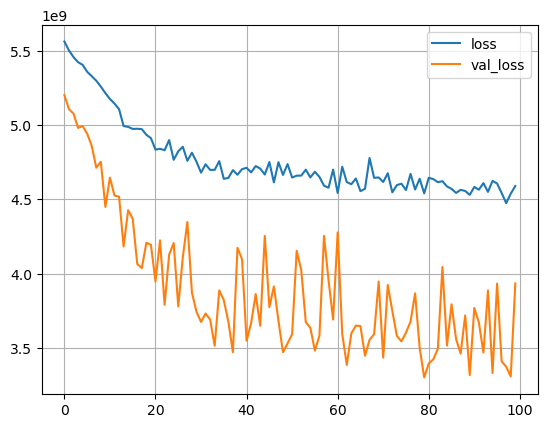

In [14]:
import matplotlib.pyplot as plt
plt.plot(history.history["loss"], label = "loss")
plt.plot(history.history["val_loss"], label = "val_loss")
plt.legend()
plt.grid()
plt.show()

## Segundo entrenamiento
Preprocesamiento: El dataset ya viene preprocesado, pero no se ha hecho ningún filtrado ni transformación, por lo que podemos hacer algo con la esperanza de mejorar nuestro modelo. Busca alguna forma de tratar los outliers, transforma las columnas que consideres que podrían aportar más información si estuvieran transformadas. También asegúrate de normalizar los datos.

Nota: deja comentarios justificando todas las decisiones de preprocesamiento que tomas.
Crea un modelo nuevo con la misma arquitectura de antes y entrénalo con los datos nuevos. Fíjate ahora cuánto tarda en llegar a un plateau y qué métrica has obtenido, guarda estos resultados en un DataFrame. ¿Tenemos un modelo mejor?



In [15]:
df2 = pd.read_csv('../Semana 13/autocasion_procesado.csv')
df2

,Kilómetros,Cambio,Potencia (cv),Garantía,largo,ancho,alto,batalla_mm,peso_masa_kg,puertas,...,combustible_Mixto Gasolina/Etanol,combustible_nan,sobrealimentacion_Compresor Lisholm,sobrealimentacion_Compresor de raices,sobrealimentacion_Compresor y turbo,sobrealimentacion_Doble turbo,sobrealimentacion_Tipo de sobrealimentador,sobrealimentacion_Turbo,sobrealimentacion_Turbo de geometría variable,sobrealimentacion_nan
0,3900.0,1.0,179.0,12.0,4366.333333,1795.666667,1476.666667,2688.333333,1829.000000,5.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,4000.0,1.0,180.0,24.0,4403.666667,1808.000000,1503.333333,2653.000000,1880.000000,5.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,10.0,1.0,140.0,36.0,3657.000000,1627.000000,1480.000000,2300.000000,1425.000000,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,10.0,1.0,140.0,36.0,3657.000000,1627.000000,1480.000000,2300.000000,1425.000000,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,10.0,1.0,180.0,12.0,4549.666667,1834.333333,1482.333333,2717.666667,1946.666667,5.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87638,60000.0,0.0,390.0,12.0,4950.000000,2008.000000,1776.000000,2984.000000,2980.000000,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
87639,66070.0,0.0,390.0,12.0,4950.000000,2008.000000,1776.000000,2984.000000,2980.000000,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
87640,31800.0,0.0,390.0,12.0,4950.000000,2008.000000,1776.000000,2984.000000,2980.000000,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
87641,6500.0,0.0,343.0,0.0,4519.000000,1852.000000,1299.333333,2450.000000,2051.666667,2.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [16]:
X = df2.drop('precio', axis =1)
y = df2['precio']

In [17]:
def z_score(columna, df2, zl = 4, zr = 4):

    len_df2 = df2.shape[0]

    mean = df2[columna].mean()
    std = df2[columna].std()

    lim_l = mean - zl*std
    lim_r = mean + zr*std

    sns.histplot(df2[columna], kde = True)
    plt.axvline(lim_l, color = "red")
    plt.axvline(lim_r, color = "red")
    plt.show()
    
    df2 = df2[df[columna].between(lim_l, lim_r) | df2[columna].isna()]

    print(f"Filas restantes: {df2.shape[0]/len_df2*100:.4}%")

    return df.reset_index(drop = True)

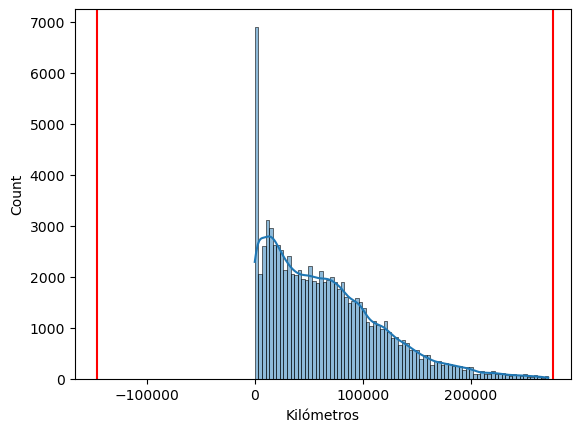

Filas restantes: 100.0%


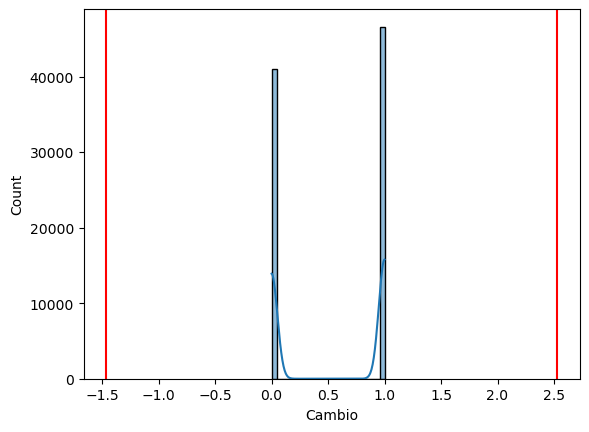

Filas restantes: 100.0%


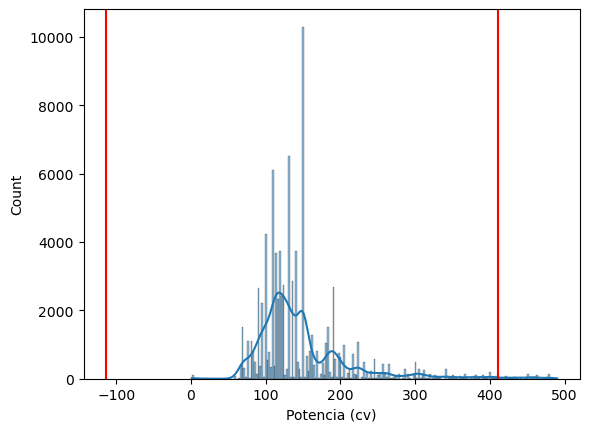

Filas restantes: 98.91%


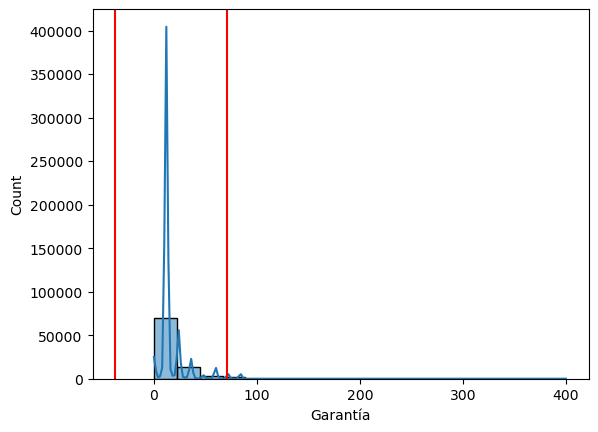

Filas restantes: 98.01%


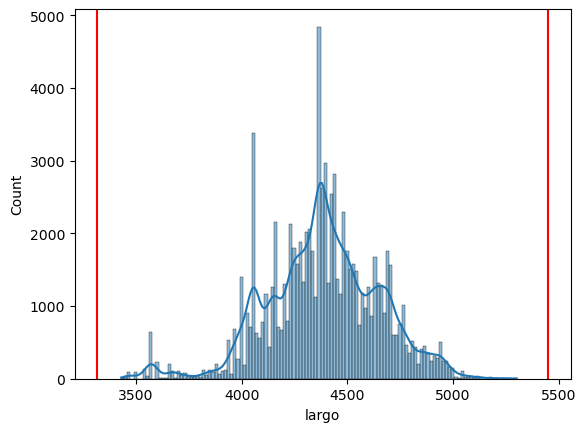

Filas restantes: 100.0%


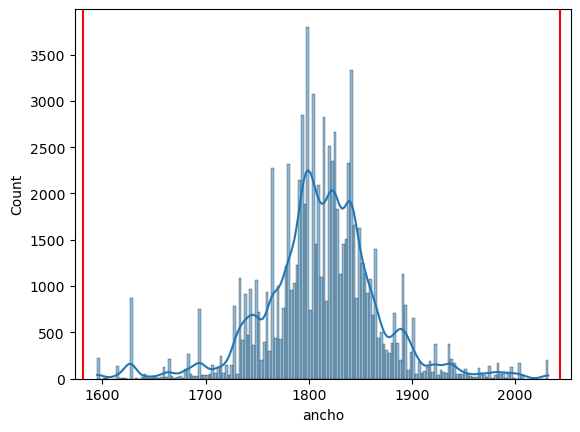

Filas restantes: 100.0%


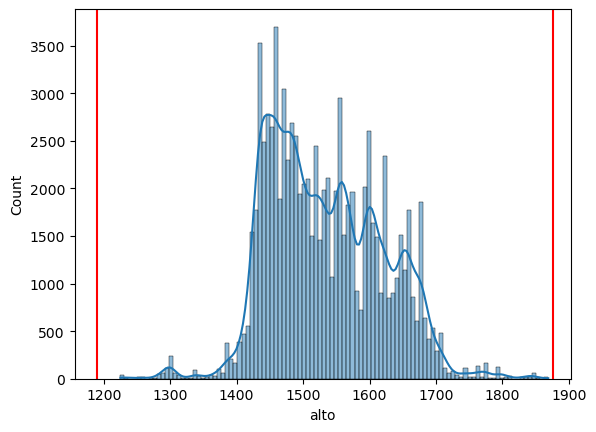

Filas restantes: 100.0%


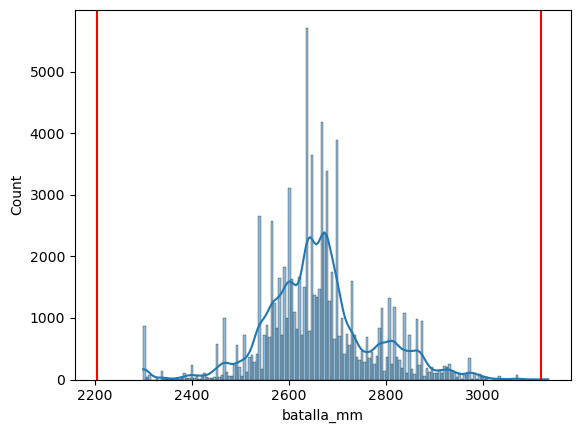

Filas restantes: 99.98%


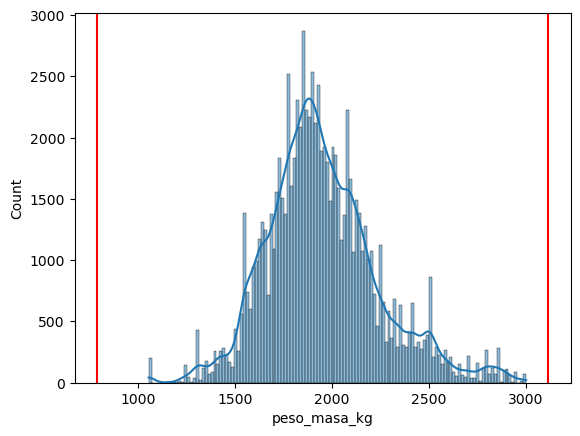

Filas restantes: 100.0%


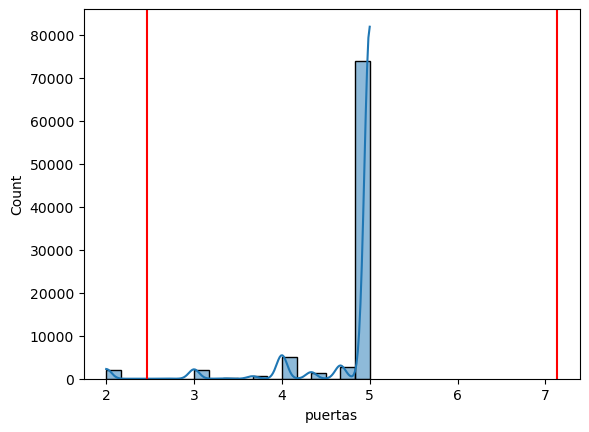

Filas restantes: 97.67%


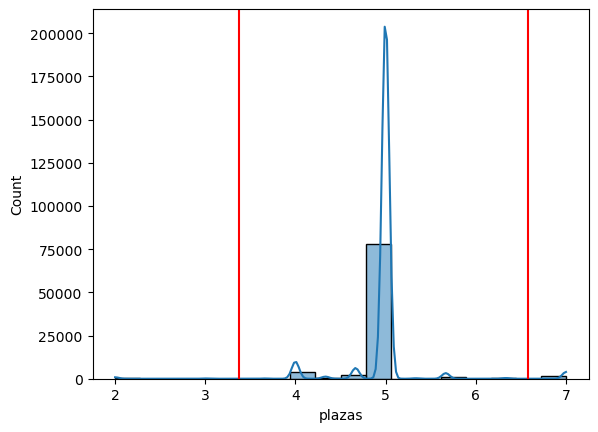

Filas restantes: 97.88%


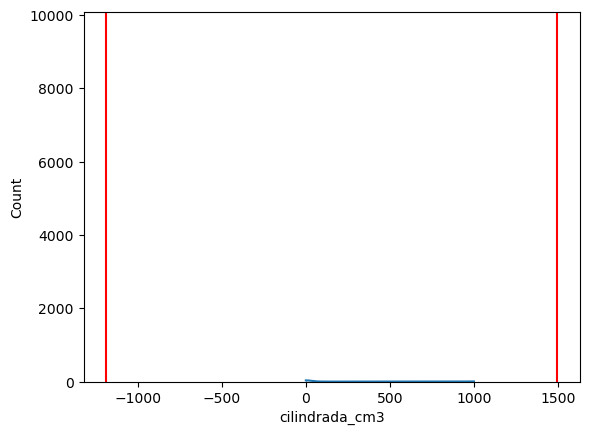

Filas restantes: 100.0%


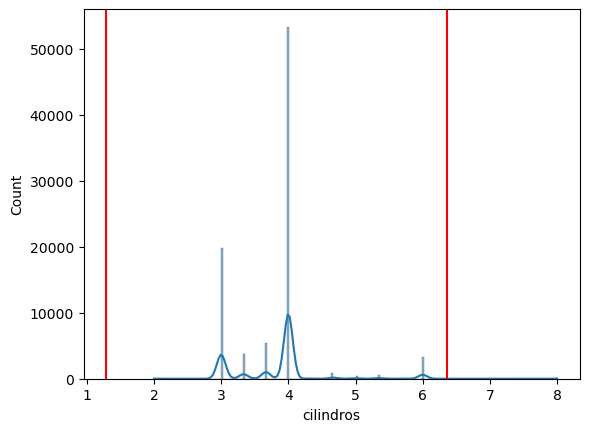

Filas restantes: 99.9%


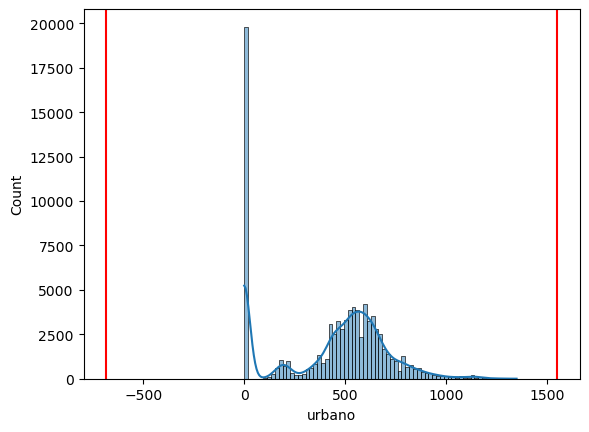

Filas restantes: 100.0%


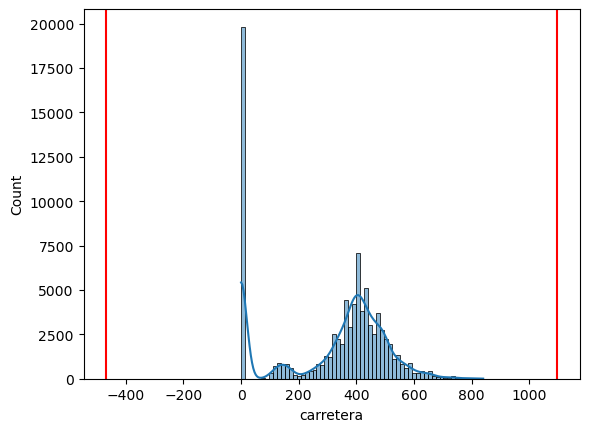

Filas restantes: 100.0%


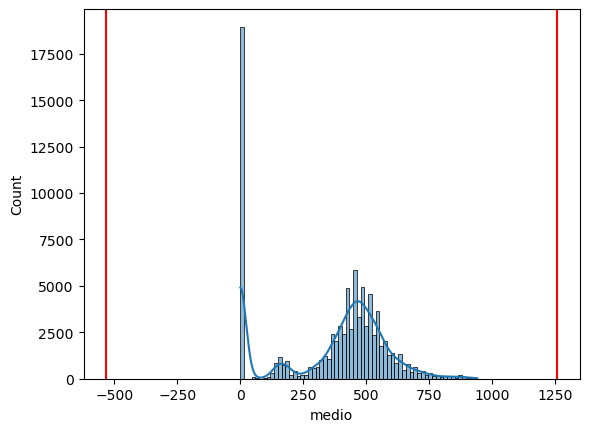

Filas restantes: 100.0%


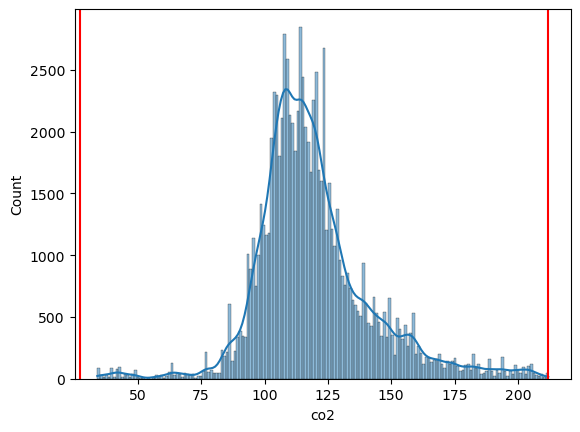

Filas restantes: 99.96%


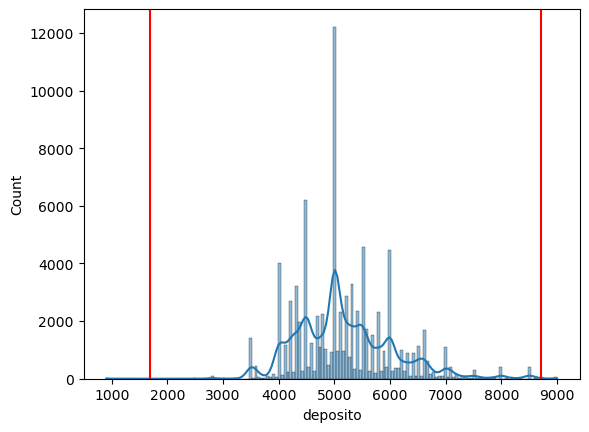

Filas restantes: 99.92%


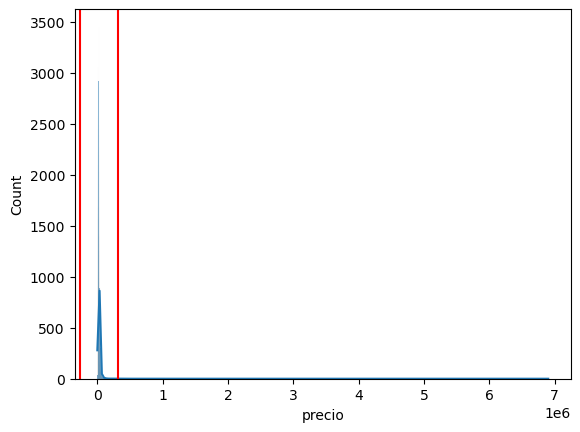

Filas restantes: 99.8%


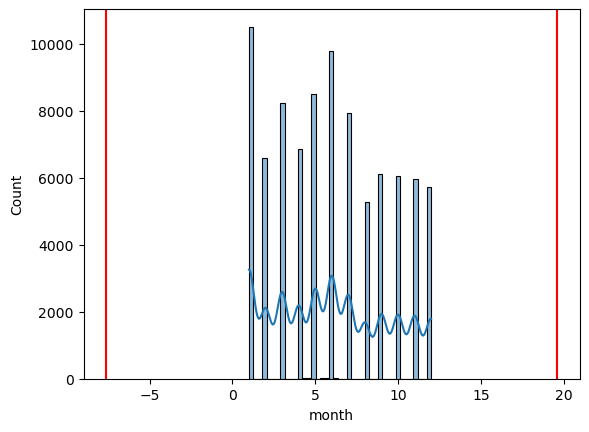

Filas restantes: 100.0%


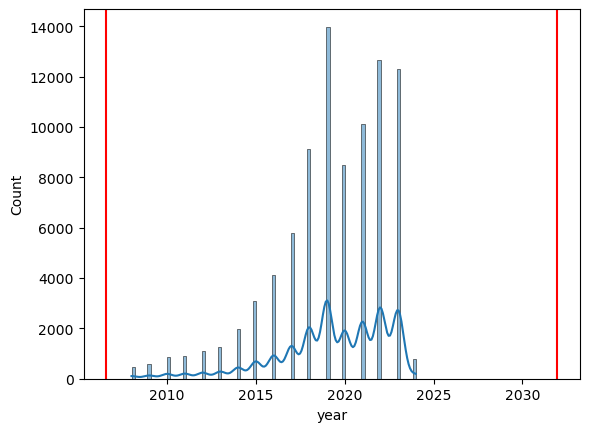

Filas restantes: 100.0%


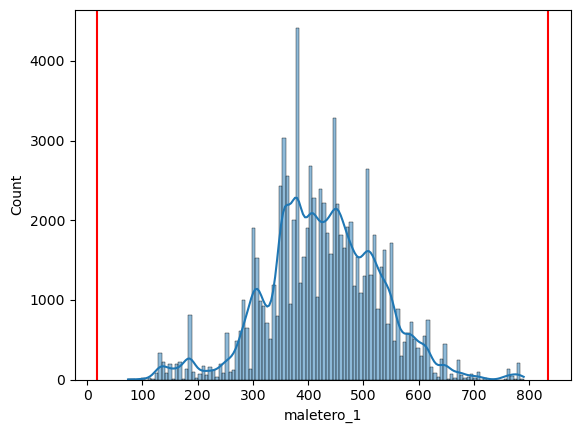

Filas restantes: 100.0%


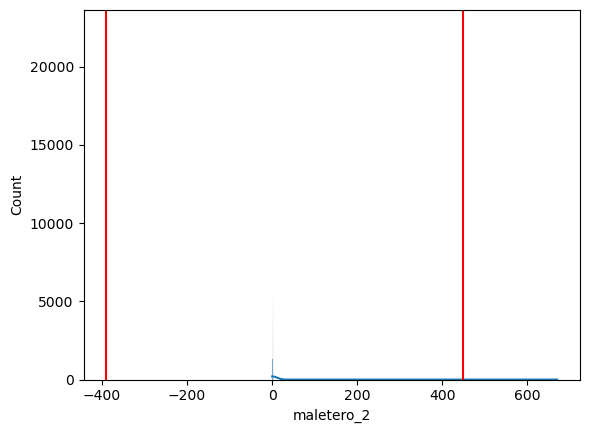

Filas restantes: 97.04%


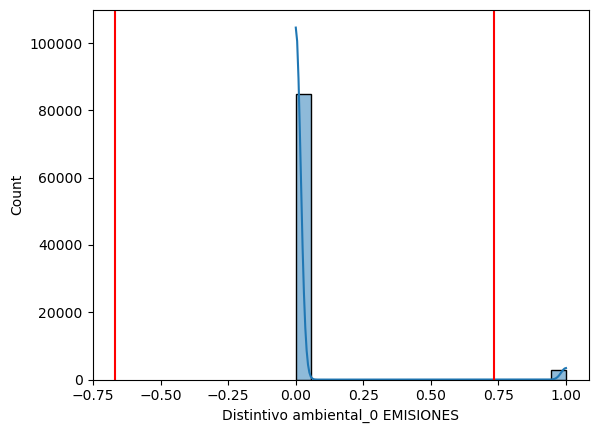

Filas restantes: 96.83%


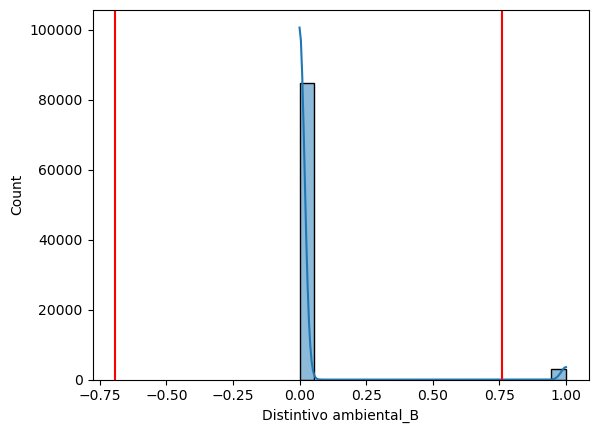

Filas restantes: 96.59%


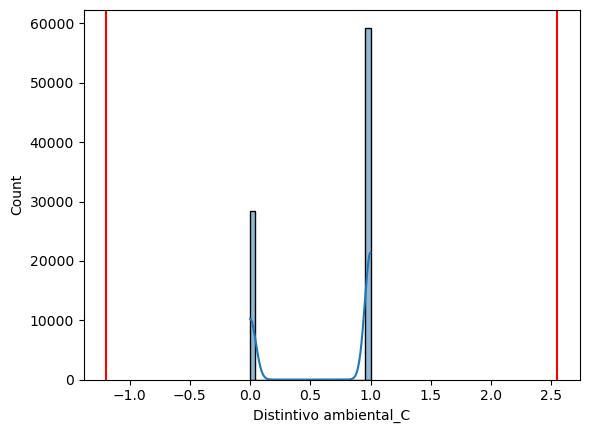

Filas restantes: 100.0%


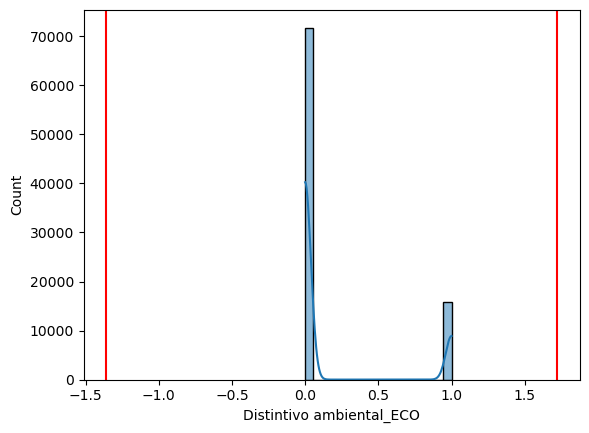

Filas restantes: 100.0%


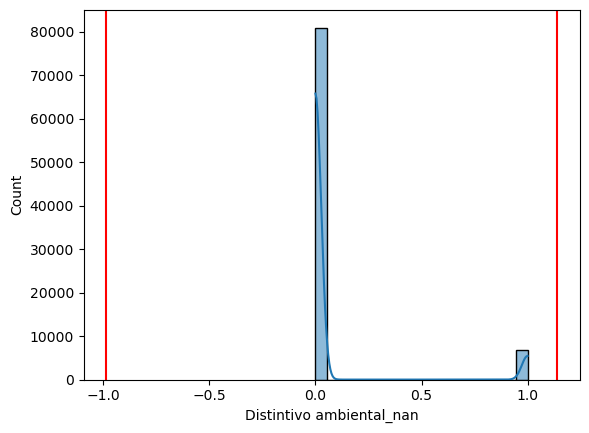

Filas restantes: 100.0%


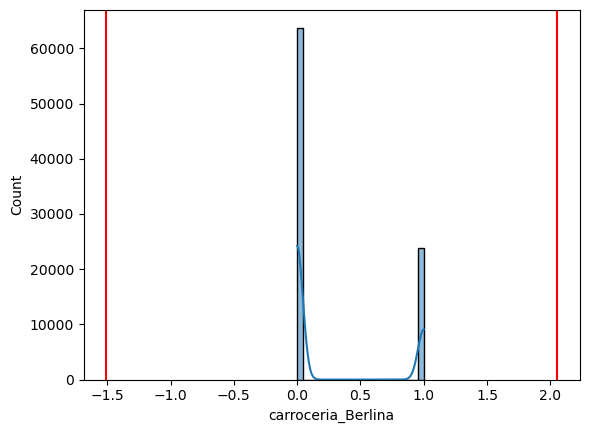

Filas restantes: 100.0%


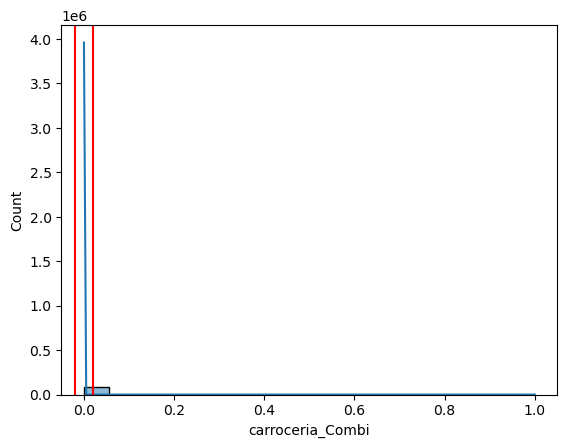

Filas restantes: 100.0%


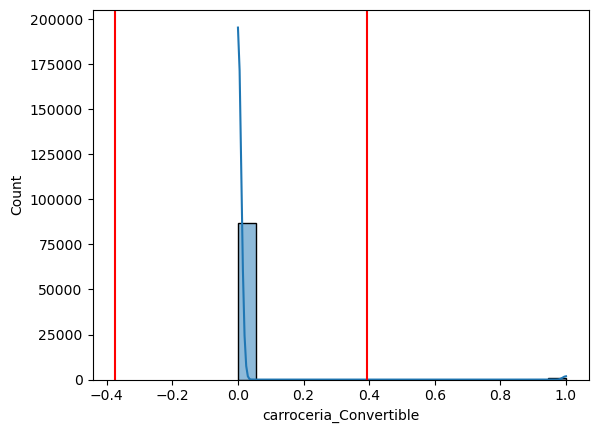

Filas restantes: 99.07%


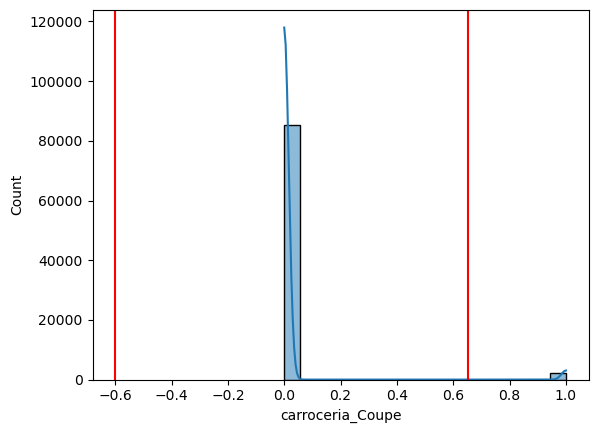

Filas restantes: 97.49%


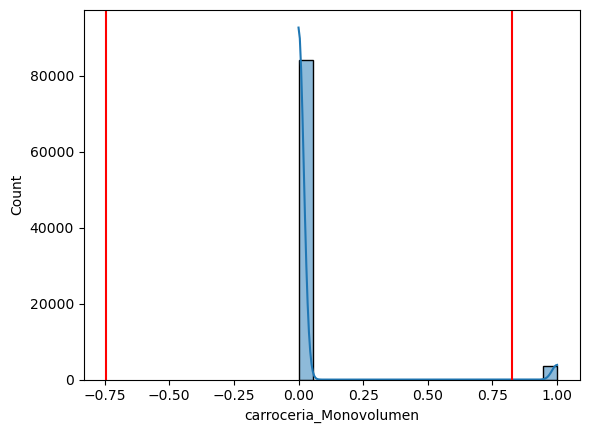

Filas restantes: 96.0%


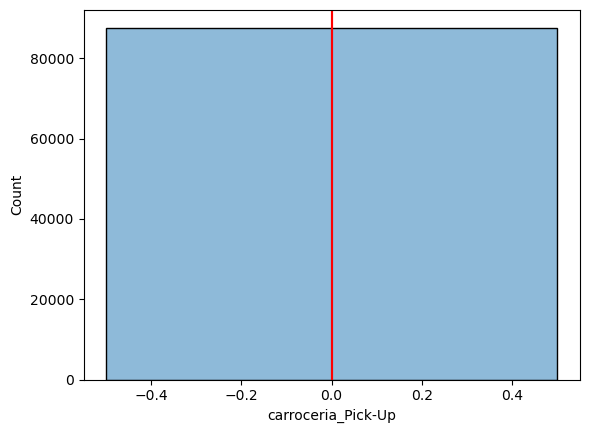

Filas restantes: 100.0%


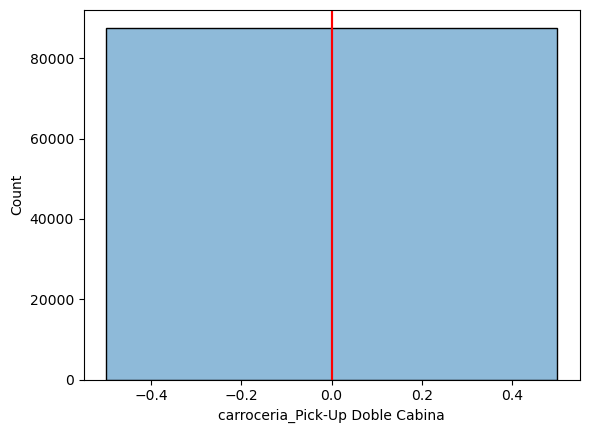

Filas restantes: 100.0%


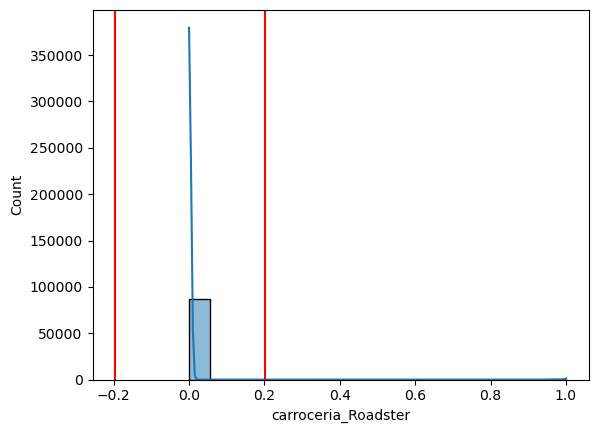

Filas restantes: 99.75%


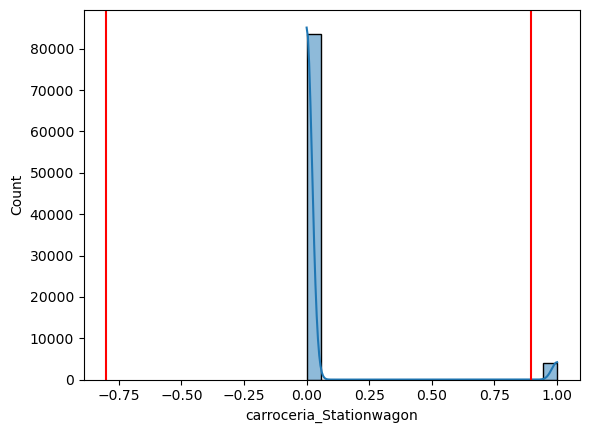

Filas restantes: 95.29%


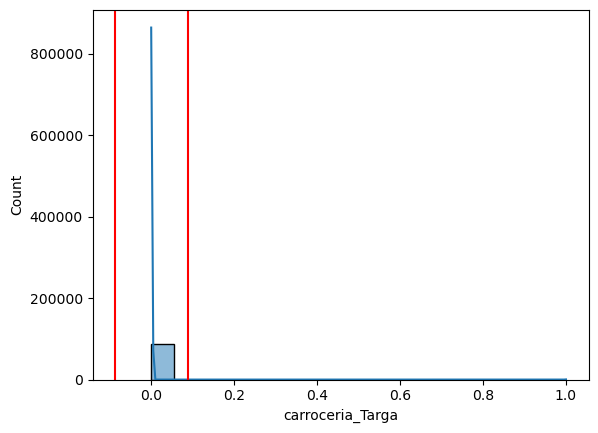

Filas restantes: 99.95%


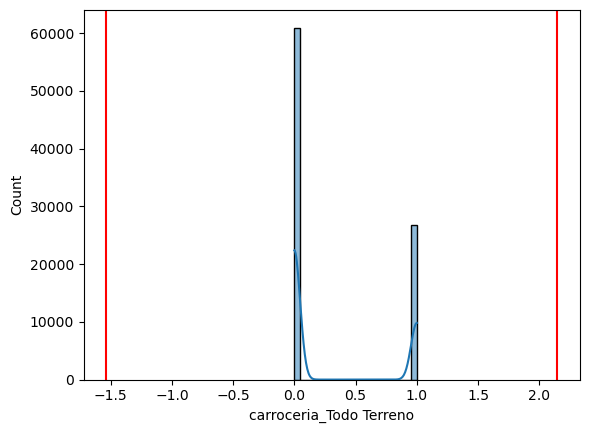

Filas restantes: 100.0%


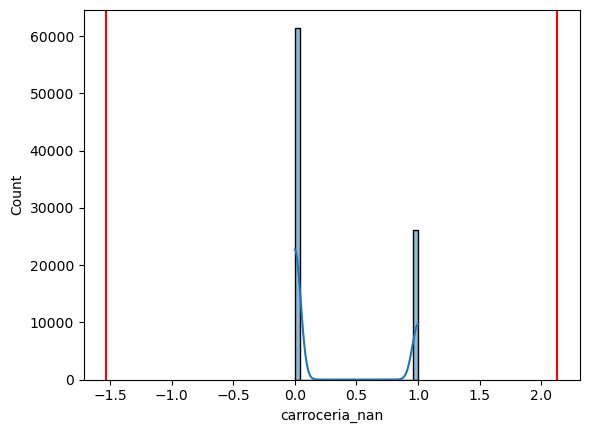

Filas restantes: 100.0%


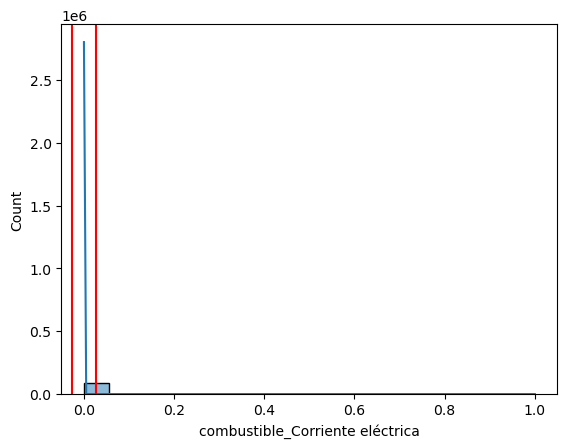

Filas restantes: 100.0%


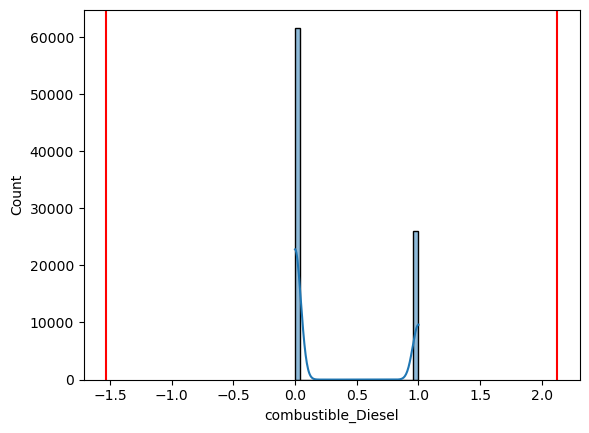

Filas restantes: 100.0%


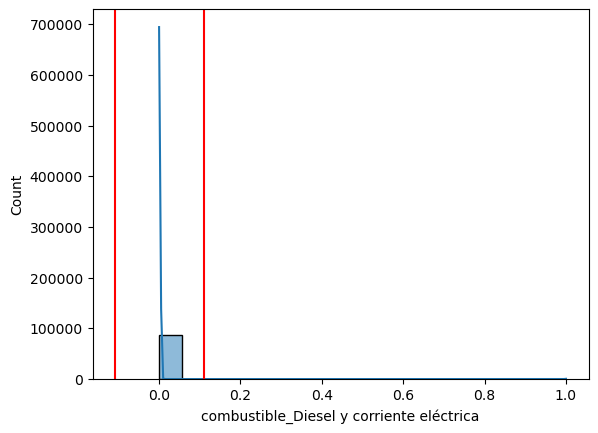

Filas restantes: 99.93%


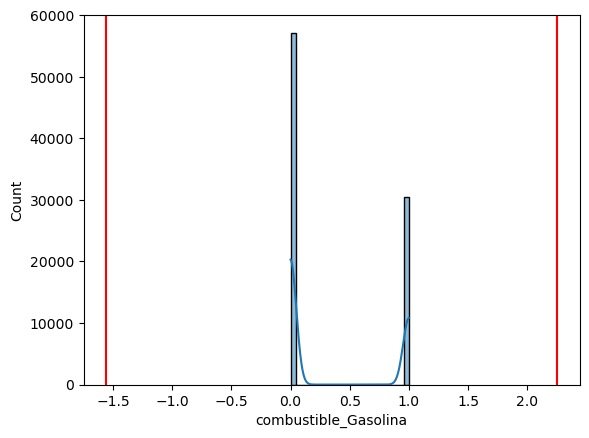

Filas restantes: 100.0%


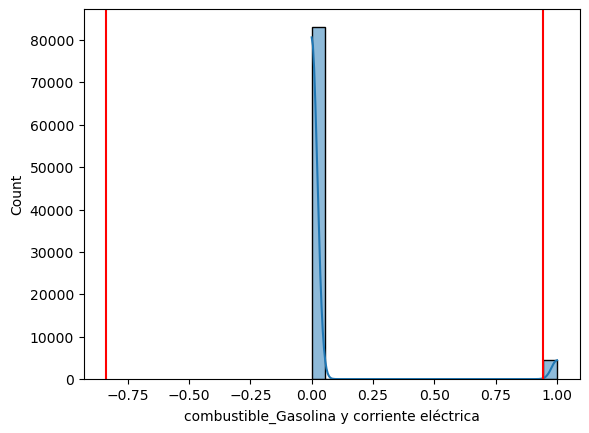

Filas restantes: 94.78%


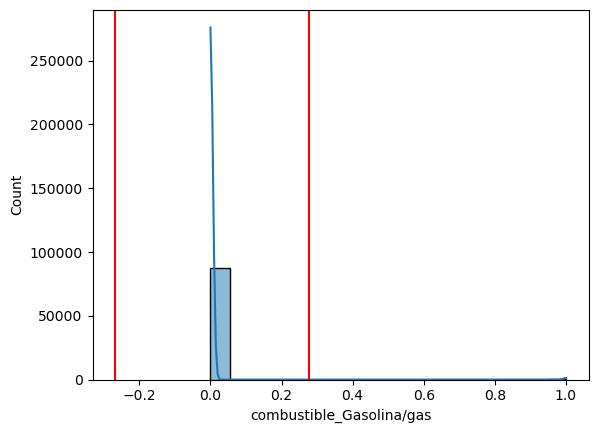

Filas restantes: 99.53%


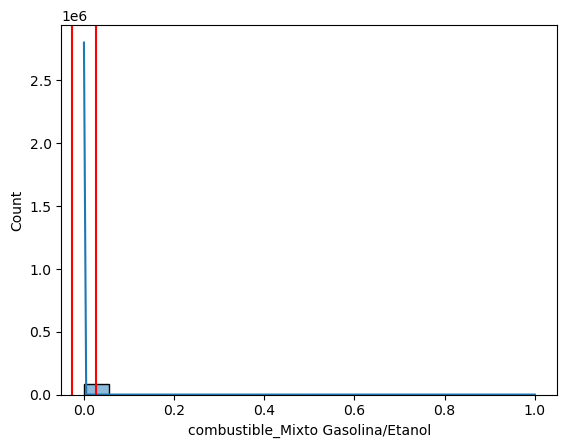

Filas restantes: 100.0%


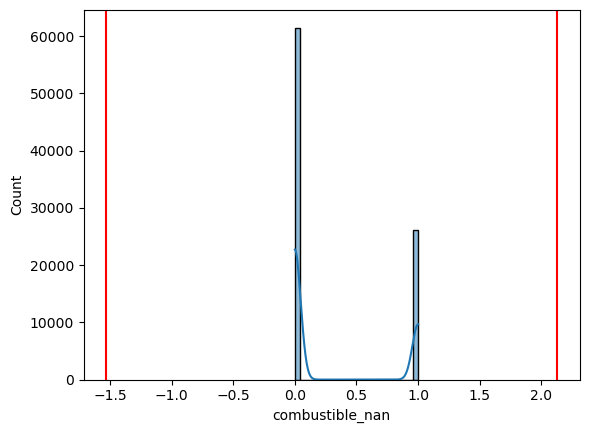

Filas restantes: 100.0%


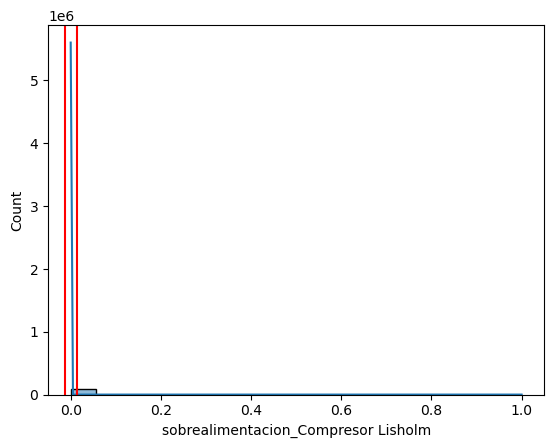

Filas restantes: 100.0%


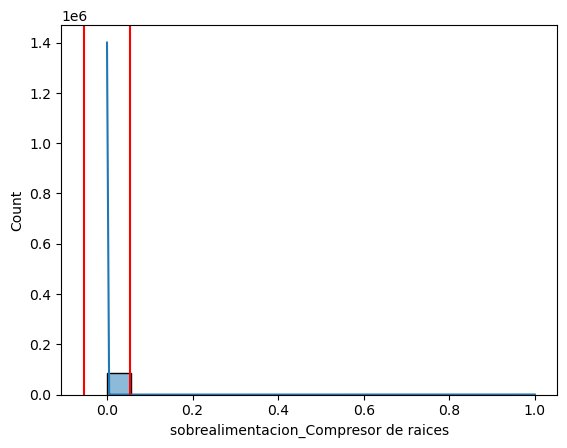

Filas restantes: 99.98%


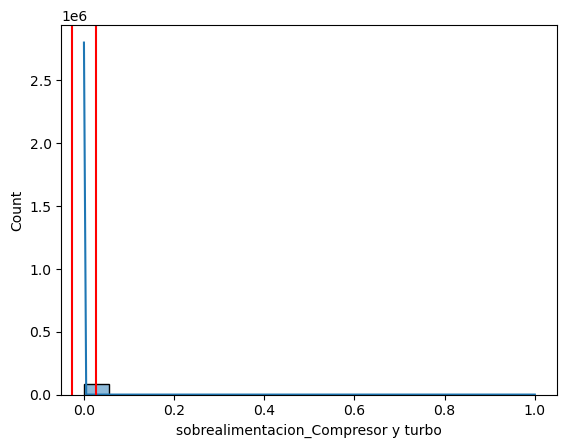

Filas restantes: 100.0%


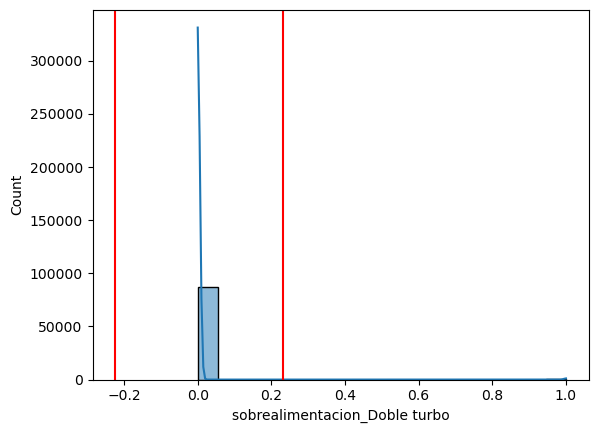

Filas restantes: 99.67%


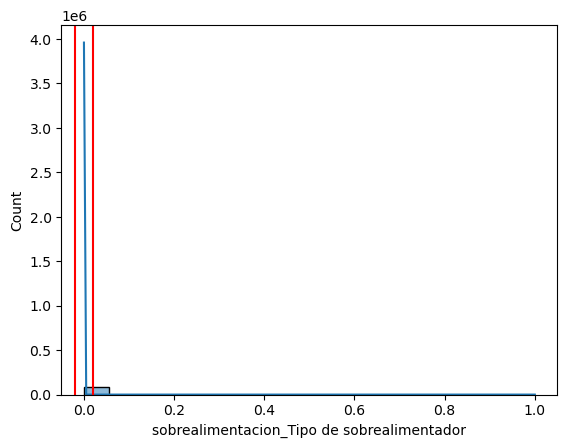

Filas restantes: 100.0%


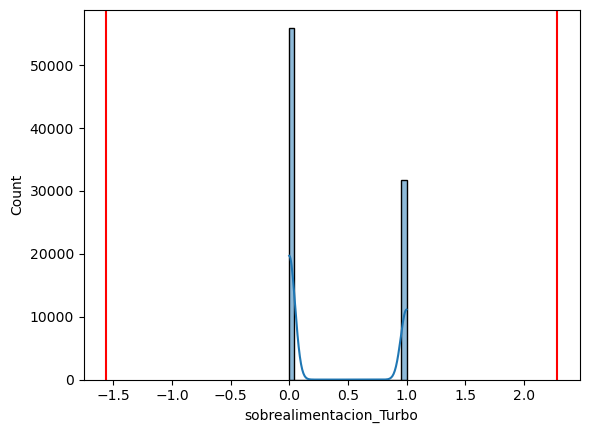

Filas restantes: 100.0%


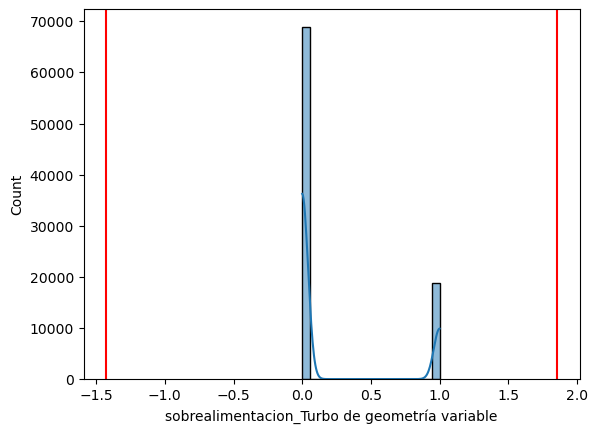

Filas restantes: 100.0%


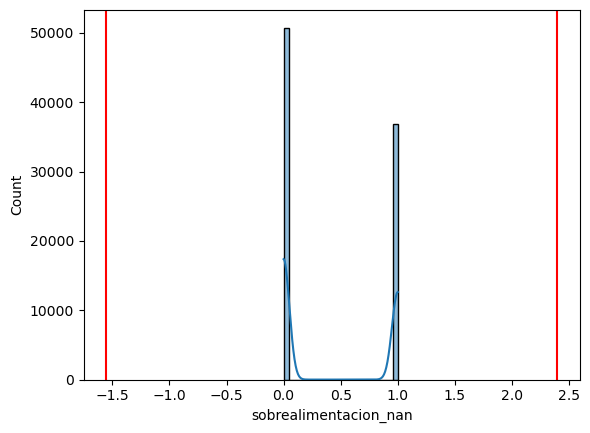

Filas restantes: 100.0%


In [18]:
for columna in df2.columns:
    df2 = z_score(columna = columna, df2 = df2)

In [19]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
# Inicializamos el modelo
model = Sequential()

# Capa de Entrada
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))

# Capas Ocultas
model.add(Dense(units = 256, activation = "relu"))
model.add(Dropout(0.5))

model.add(Dense(units = 128, activation = "relu"))
model.add(Dropout(0.5))



# Compilamos el modelo
model.compile(optimizer = "adam",
              loss      = 'mean_squared_error',
              metrics   = ["MSE"])

C:\Users\Tato\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
history = model.fit(X_train_scaled, y_train,
                    validation_data = (X_test, y_test),
                    epochs = 100,
                    verbose = 1)

Epoch 1/100
2192/2192 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - MSE: 7210311680.0000 - loss: 7210311680.0000 - val_MSE: 54679375446016.0000 - val_loss: 54679375446016.0000
Epoch 2/100
2192/2192 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - MSE: 4282454272.0000 - loss: 4282454272.0000 - val_MSE: 103192612306944.0000 - val_loss: 103192612306944.0000
Epoch 3/100
2192/2192 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - MSE: 4781851136.0000 - loss: 4781851136.0000 - val_MSE: 2853349980372992.0000 - val_loss: 2853349980372992.0000
Epoch 4/100
2192/2192 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - MSE: 6083968000.0000 - loss: 6083968000.0000 - val_MSE: 11600055978950656.0000 - val_loss: 11600055978950656.0000
Epoch 5/100
2192/2192 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - MSE: 3838777856.0000 - loss: 3838777856.0000 - val_MSE: 22637774037319680.0000 - val_loss: 22637774037319680.0000
Epoch 6/100
2192/2192 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - MSE: 6339607040.0000 - loss: 6339607040.0000 - val_MSE: 34556248154177536.0000 - val_loss: 3455624

In [22]:
epochs_to_plateau = len(history.history['loss']) - next((i for i, x in enumerate(history.history['loss'][::-1]) if x > history.history['loss'][-1]),        len(history.history['loss']))

In [23]:
resultados_2 = pd.DataFrame({'Modelo': ['Segundo entrenamiento'], 
                            'Epochs': [epochs_to_plateau], 
                          'MSE': ["{:.4f}".format(history.history['val_loss'][-1])]})
resultados_2

,Modelo,Epochs,MSE
0,Segundo entrenamiento,99,525261546679435264.0000


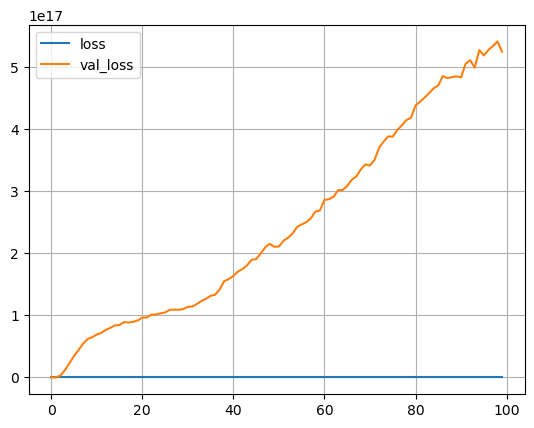

In [24]:
import matplotlib.pyplot as plt
plt.plot(history.history["loss"], label = "loss")
plt.plot(history.history["val_loss"], label = "val_loss")
plt.legend()
plt.grid()
plt.show()

##  Tercer entrenamiento
Tuning de arquitectura: Vamos a probar una nueva arquitectura. Basándote en los resultados anteriores, piensa qué sería lo mejor para mejorar las métricas. Plantéate añadir o quitar capas, aumentar o disminuir el número de neuronas en cada capa, añadir capas Dropout o cambiar las funciones de activación.

Nota: deja comentarios justificando todas las decisiones de modelado de arquitectura que tomas.
Cuando tengas una arquitectura nueva que creas que funcionará mejor, ponla a prueba con los datos que te funcionaron mejor. ¿Conseguiste mejorar el modelo? Si no es así, piensa en las posibles causas y coméntalas, guarda estos resultados en un DataFrame.

In [25]:
model = Sequential()


model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))



model.add(Dense(units = 512, activation = "relu")) 

model.add(Dropout(0.5))

model.add(Dense(units = 256, activation = "relu")) 

model.add(Dropout(0.5))

model.add(Dense(units = 128, activation = "relu")) 



model.add(Dense(units = 128)) 

model.compile(optimizer = "adam",
              loss      = 'mean_squared_error',
              metrics   = ["MSE"])

C:\Users\Tato\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
history = model.fit(X_train_scaled, y_train,
                    validation_data = (X_test, y_test),
                    epochs = 100,
                    verbose = 1)

Epoch 1/100
2192/2192 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - MSE: 3800090624.0000 - loss: 3800090624.0000 - val_MSE: 148056215706927104.0000 - val_loss: 148056215706927104.0000
Epoch 2/100
2192/2192 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - MSE: 3085112320.0000 - loss: 3085112320.0000 - val_MSE: 177061246548312064.0000 - val_loss: 177061246548312064.0000
Epoch 3/100
2192/2192 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - MSE: 4596887040.0000 - loss: 4596887040.0000 - val_MSE: 89795954999296000.0000 - val_loss: 89795954999296000.0000
Epoch 4/100
2192/2192 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - MSE: 2790333440.0000 - loss: 2790333440.0000 - val_MSE: 69268936197144576.0000 - val_loss: 69268936197144576.0000
Epoch 5/100
2192/2192 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - MSE: 2760950528.0000 - loss: 2760950528.0000 - val_MSE: 39645541734285312.0000 - val_loss: 39645541734285312.0000
Epoch 6/100
2192/2192 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - MSE: 4011777024.0000 - loss: 4011777024.0000 - val_MSE: 33319112889335808.0000

In [27]:
epochs_to_plateau = len(history.history['loss']) - next((i for i, x in enumerate(history.history['loss'][::-1]) if x > history.history['loss'][-1]),        len(history.history['loss']))

In [28]:
resultados_3 = pd.DataFrame({'Modelo': ['Tercer entrenamiento'], 
                          'Epochs': [epochs_to_plateau], 
                          'MSE': ["{:.4f}".format(history.history['val_loss'][-1])]})
resultados_3

,Modelo,Epochs,MSE
0,Tercer entrenamiento,98,119018375610368.0000


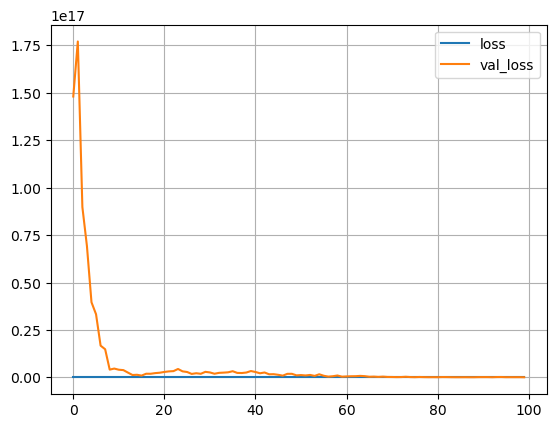

In [29]:
import matplotlib.pyplot as plt
plt.plot(history.history["loss"], label = "loss")
plt.plot(history.history["val_loss"], label = "val_loss")
plt.legend()
plt.grid()
plt.show()

## Último entrenamiento
Fine tuning: Intenta cambiar algunos hiperparámetros del modelo. Prueba con otro optimizador, o ajusta el learning rate al que ya estás utilizando. Considera investigar callbacks en la documentación para modificar el learning rate sobre la marcha.
Nota: deja comentarios justificando todas las decisiones de fine tuning que tomas.
Entrena el nuevo modelo optimizado y comenta los resultados, guarda estos resultados en un DataFrame.

In [30]:
# Nuevo modelo hiperparametrizado (ReduceLROnPlateau, Learnirng_rate)
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))

model.add(Dense(units=512, activation="relu")) 
model.add(Dropout(0.5))

model.add(Dense(units=256, activation="relu")) 
model.add(Dropout(0.5))

model.add(Dense(units=128, activation="relu")) 

model.add(Dense(units=128)) 

# Compilar el modelo con un optimizador (RMSprop) a cambio por Adam y una tasa de aprendizaje diferente
model.compile(optimizer=RMSprop(learning_rate=0.0005),
              loss='mean_squared_error',
              metrics=["MSE"])

# Callback que reduzca la tasa de aprendizaje cuando el modelo se estabiliza, con ReduceLROnPlateau en Keras. Este callback monitorea una métrica específica (val_loss) y reduce la tasa de aprendizaje si no se observa mejora durante un número determinado de épocas.
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)


C:\Users\Tato\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:

history = model.fit(X_train, y_train, 
                    validation_split=0.2, 
                    epochs=100, 
                    batch_size=32, 
                    callbacks=[reduce_lr],
                    verbose=1)


Epoch 1/100
1753/1753 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - MSE: 4695320576.0000 - loss: 4695320576.0000 - val_MSE: 4625446400.0000 - val_loss: 4625446400.0000 - learning_rate: 5.0000e-04
Epoch 2/100
1753/1753 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - MSE: 5995582976.0000 - loss: 5995582976.0000 - val_MSE: 4641134080.0000 - val_loss: 4641134080.0000 - learning_rate: 5.0000e-04
Epoch 3/100
1753/1753 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - MSE: 5285937664.0000 - loss: 5285937664.0000 - val_MSE: 4757238784.0000 - val_loss: 4757238784.0000 - learning_rate: 5.0000e-04
Epoch 4/100
1753/1753 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - MSE: 3971186432.0000 - loss: 3971186432.0000 - val_MSE: 4874393600.0000 - val_loss: 4874393600.0000 - learning_rate: 5.0000e-04
Epoch 5/100
1753/1753 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - MSE: 4398918144.0000 - loss: 4398918144.0000 - val_MSE: 4857057792.0000 - val_loss: 4857057792.0000 - learning_rate: 5.0000e-04
Epoch 6/100
1753/1753 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - MSE: 4139534

In [32]:
epochs_to_plateau = len(history.history['loss']) - next((i for i, x in enumerate(history.history['loss'][::-1]) if x > history.history['loss'][-1]),        len(history.history['loss']))

In [49]:
resultados_4 = pd.DataFrame({'Modelo': ['Cuarto entrenamiento'], 
                             'Epochs': [epochs_to_plateau], 
                             'MSE': ["{:.4f}".format(history.history['val_loss'][-1])]})
                             
resultados_4

,Modelo,Epochs,MSE
0,Cuarto entrenamiento,99,4702481408.0000


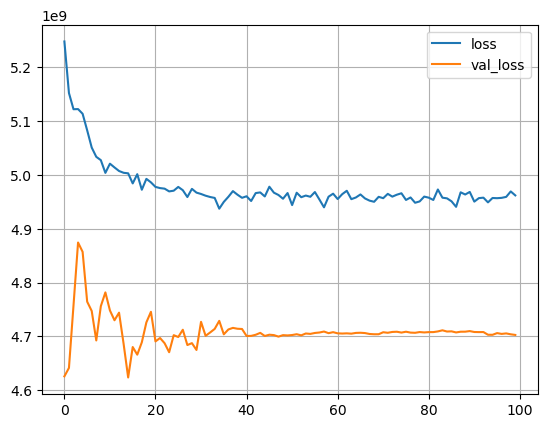

In [34]:
import matplotlib.pyplot as plt
plt.plot(history.history["loss"], label = "loss")
plt.plot(history.history["val_loss"], label = "val_loss")
plt.legend()
plt.grid()
plt.show()

In [50]:
result_final = pd.concat([resultados, resultados_2, resultados_3, resultados_4], ignore_index=True)
result_final = result_final.reset_index(drop=True)
result_final

,Modelo,Epochs,MSE
0,Primer entrenamiento,96,3935729152.0000
1,Segundo entrenamiento,99,525261546679435264.0000
2,Tercer entrenamiento,98,119018375610368.0000
3,Cuarto entrenamiento,99,4702481408.0000


In [ ]:
##############################################################################################################################